# Exercise 1

In [3]:
from Automata import Automata
from utils import visualize
import math

%load_ext autoreload
%autoreload 2

## Task 1 - Setting up the modeling environment (DONE)

Scenario to show that our implementation allows for different pedestrians and obstacles editing an easy JSON file (using as input for the automata the file path) or writing in a notebook a dictionary as follow: 

In [52]:
configTask1 = {
    "name": "Task1Scenario",
    "dimensions": {
        "width": 7,
        "height": 7
    },
    "pedestrians": [
        [1, 0, 4]
    ],
    "targets": [
        [[1], 6, 4]
    ],
    "obstacles": [
        [3, 4], [3, 3], [3, 5]
    ]
}

In [53]:
task1Automata = Automata(configTask1)

Let's take a look at the initial state:

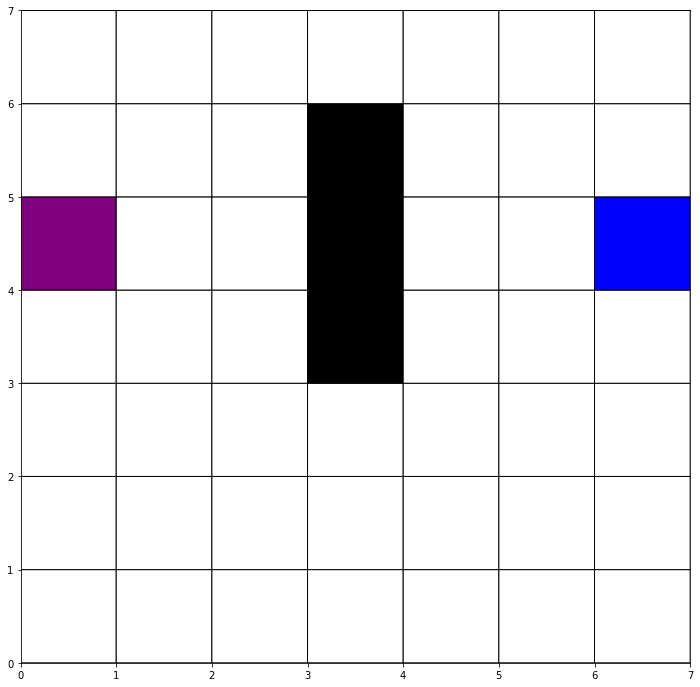

In [54]:
visualize(task1Automata.getState())

Let's simulate for 10 time steps and let's take a look at the final state with the followed path:

In [55]:
task1Automata.simulate(task1Automata.basicOperator, 10)

Simulation finished after 7 steps. All pedestrians achieved their targets.


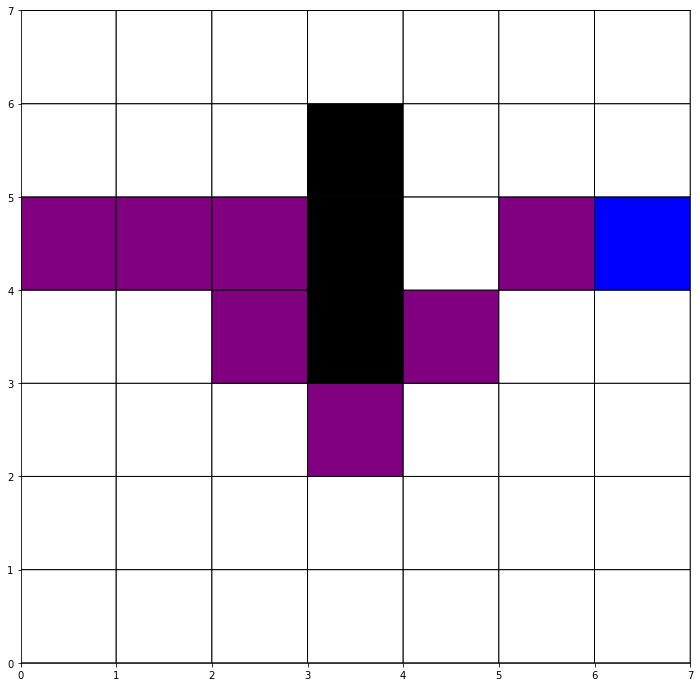

In [56]:
visualize(task1Automata.getStateWithPaths())

## Task 2 - First step of a single pedestrian (DONE)

Scenario:
- 50 by 50 cells (2500 in total)
- Single pedestrian at position (5, 25)
- Target at (25, 25)

In [260]:
configTask2 = {
    "name": "Task2Scenario",
    "dimensions": {
        "width": 49,
        "height": 49
    },
    "pedestrians": [
        [1, 4, 24]
    ],
    "targets": [
        [[1], 24, 24]
    ],
    "obstacles": []
}

In [261]:
task2Automata = Automata(configTask2)

Let's take a look at the initial state:

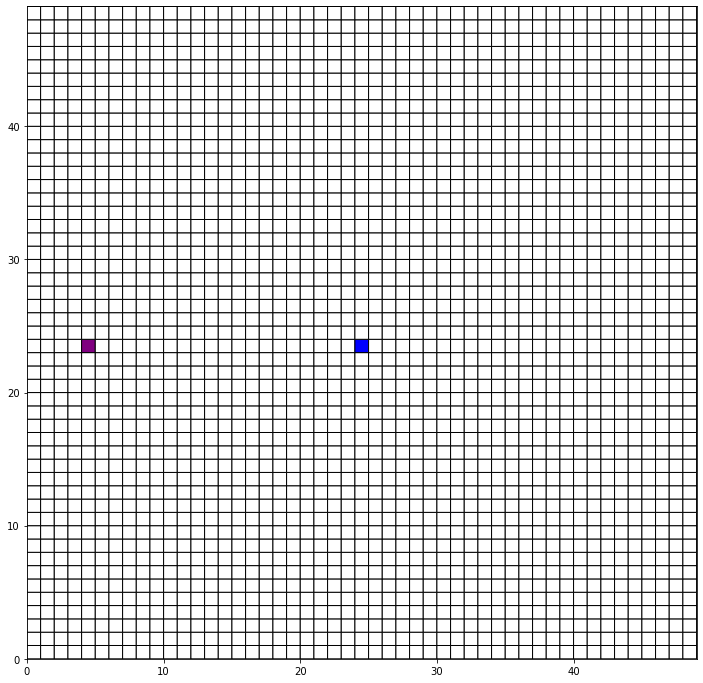

In [262]:
visualize(task2Automata.getState())

Let's simulate for 25 time steps and let's take a look at the final state with the followed path:

In [263]:
task2Automata.simulate(task2Automata.basicOperator, 25)

Simulation finished after 20 steps. All pedestrians achieved their targets.


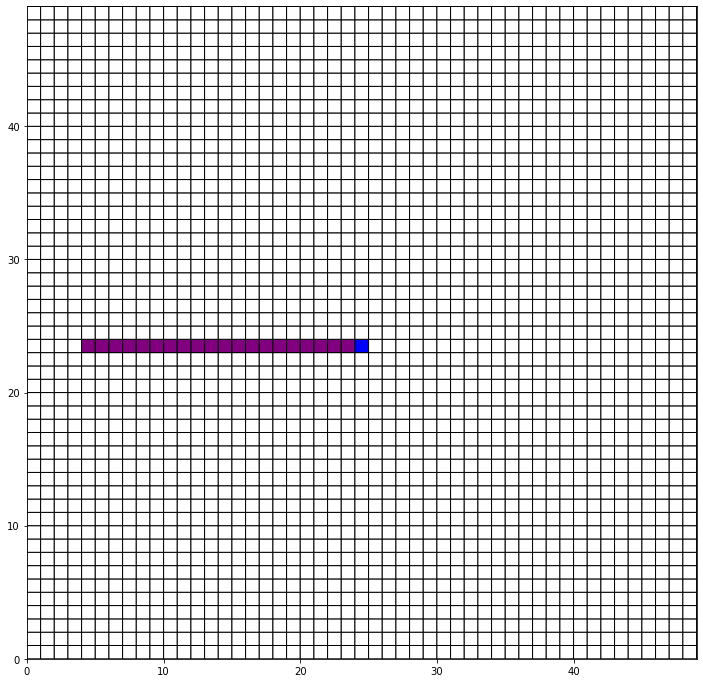

In [264]:
visualize(task2Automata.getStateWithPaths())

## Task 3 - Interaction of pedestrians

Scenario:
- 50 by 50 cells (2500 in total)
- 5 equidistant pedestrians on the same circle 
- 1 single target for all of them
- 25 Steps

In [131]:
# First we need to find 5 equidistant points on our circle with r = 20 and center (25,25)
r = 20
numPoints = 5
points = []
for index in range(numPoints):
    points.append([r*math.cos((index*2*math.pi)/numPoints),r*math.sin((index*2*math.pi)/numPoints)])

# Now we want to shift our points by 25 units to bring them on our circle
for i, p in enumerate(points):
    p[0] = p[0] + 25.0
    p[1] = p[1] + 25.0

# We have now our final points
a = []
no_points = 5
for i in range(no_points):
    x = 25.0 + 20 * math.cos(2 * math.pi * i / no_points)
    y = 25.0 + 20 * math.sin(2 * math.pi * i / no_points)
    a.append((x,y))
print(a)

[(45.0, 25.0), (31.18033988749895, 44.02113032590307), (8.819660112501055, 36.75570504584947), (8.819660112501051, 13.24429495415054), (31.180339887498945, 5.978869674096927)]


In [132]:
configTask3 = {
    "name": "Task3Scenario",
    "dimensions": {
        "width": 49,
        "height": 49
     },
    "pedestrians": [
        [1, 45, 25], [2, 31, 44], [3, 9, 37], [4, 9, 13], [5, 31, 6]
     ],
     "targets": [
        [[1,2,3,4,5], 24, 24]
     ],
     "obstacles": []
}

In [133]:
task3Automata = Automata(configTask3)

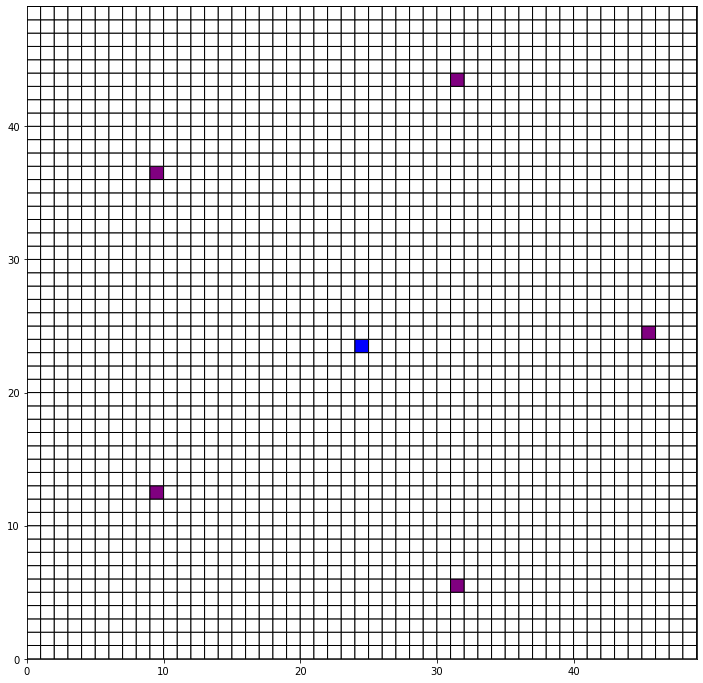

In [134]:
visualize(task3Automata.getState())

Let's take a look at the initial state:

Let's simulate for 25 time steps and let's take a look at the final state with the followed paths:

In [135]:
task3Automata.simulate(task3Automata.basicOperator, 25)

Simulation finished after 21 steps. All pedestrians achieved their targets.


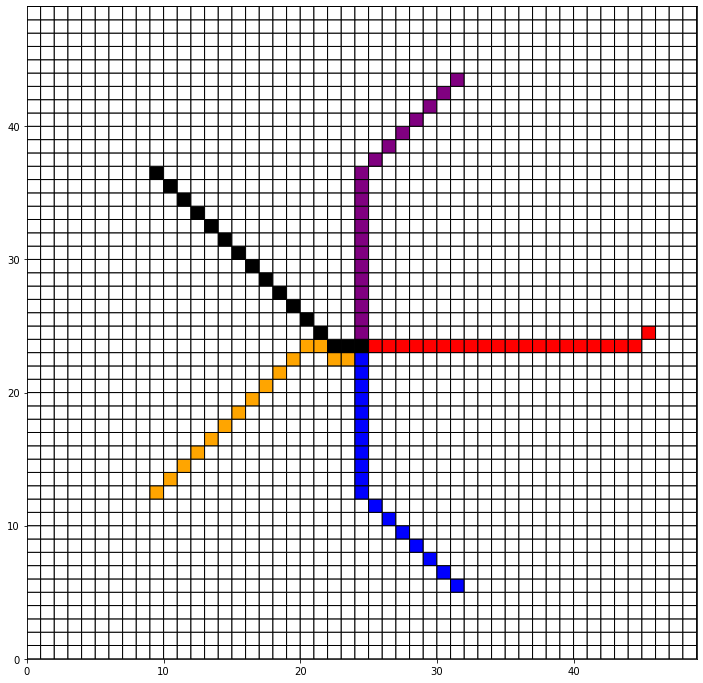

In [136]:
visualize(task3Automata.getStateWithPaths())

In [137]:
paths = task3Automata.getPaths()
for path in paths:
    print(len(paths[path]))

21
20
15
15
18


## Task 4 - Obstacle avoidance

### Scenario 4.1 - What happens in the scenario shown in figure (10) of [8] (bottleneck), if obstacle avoidance is not implemented?

### Scenario 4.2 - What happens for the "chicken test" scenario, figure 5?

Without obstacle avoidance:

In [67]:
configTask42 = {
    "name": "Task1Scenario",
    "dimensions": {
        "width": 9,
        "height": 9
    },
    "pedestrians": [
        [1, 0, 5]
    ],
    "targets": [
        [[1], 8, 5]
    ],
    "obstacles": [
        [3, 2], [4, 2], [5, 2], [5, 4], [5, 5], [5, 6], [5,8], [4, 8], [3, 8], [5, 3], [5, 7]
    ]
}
task42Automata = Automata(configTask42)

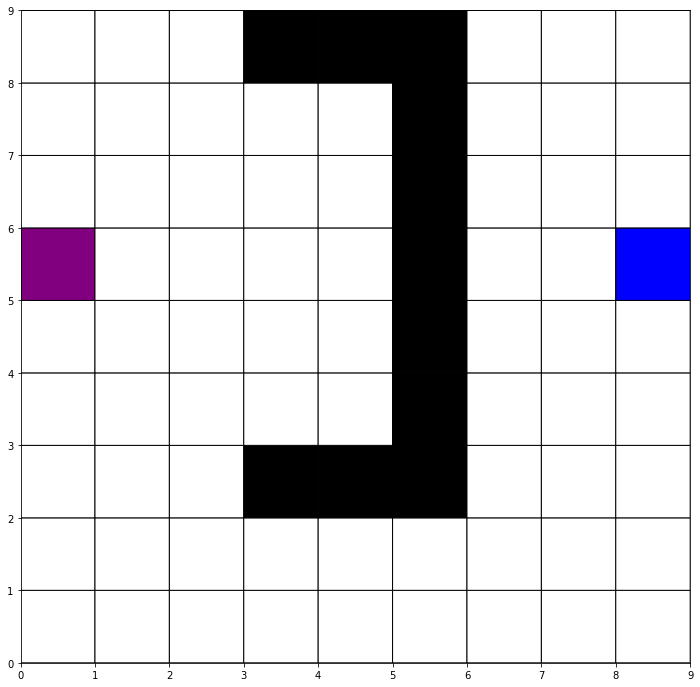

In [68]:
visualize(task42Automata.getState())

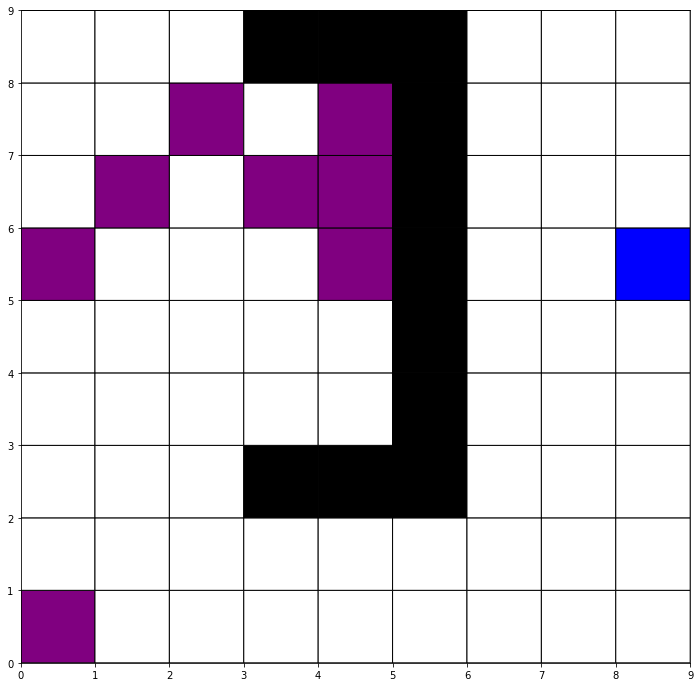

In [69]:
task42Automata.simulate(task42Automata.operatorWithCostFunction, 20, avoidObstacles = True)
visualize(task42Automata.getStateWithPaths())

With obstacle avoidance:

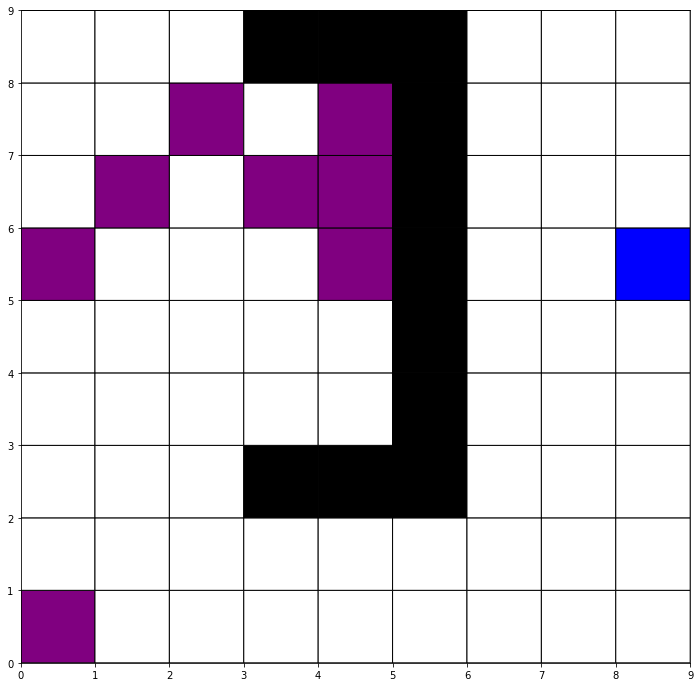

In [70]:
task42Automata = Automata(configTask42)
task42Automata.simulate(task42Automata.operatorWithCostFunction, 50, avoidObstacles = True)
visualize(task42Automata.getStateWithPaths())

In [47]:
task42Automata.getPaths()

{1: [(0, 5),
  (2, 1),
  (6, 1),
  (8, 5),
  (4, 7),
  (1, 3),
  (4, 0),
  (7, 3),
  (6, 6),
  (3, 6),
  (1, 2),
  (5, 0),
  (7, 4)]}

## Task 5 - Tests